In [1]:
import pandas as pd

df_js = pd.read_csv("hf://datasets/jacob-hugging-face/job-descriptions/training_data.csv")
df_js.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [2]:
num_unique = df_js['position_title'].nunique()
print(f"There are {num_unique} unique roles in the dataset.")

There are 725 unique roles in the dataset.


In [3]:
import pandas as pd
import json

# As
df_js['model_response'] = df_js['model_response'].apply(json.loads)

# Extract the keys from the 'model_response' dictionaries and create new columns
model_response_keys = df_js['model_response'].apply(lambda x: x.keys()).explode().unique()
for key in model_response_keys:
    df_js[key] = df_js['model_response'].apply(lambda x: x.get(key, None))


display(df_js)

,company_name,job_description,position_title,description_length,model_response,Core Responsibilities,Required Skills,Educational Requirements,Experience Level,Preferred Qualifications,Compensation and Benefits,medical specialty,schedule,license/certification
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,{'Core Responsibilities': 'Responsible for exp...,Responsible for expanding Google Workspace pro...,Bachelor's degree or equivalent experience. Ex...,Bachelor's degree or equivalent experience.,Experience managing enterprise SaaS accounts a...,Experience building strategic partnerships wit...,N/A,None,None,None
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,{'Core Responsibilities': 'as an asc you will ...,as an asc you will be highly influential in gr...,a passion to help people understand how apple ...,N/A,years preferred,N/A,N/A,None,None,None
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,{'Core Responsibilities': 'Help drive business...,Help drive business by supporting licensing ma...,2+ years experience in preferably outbound lic...,N/A,2+ years experience in preferably outbound lic...,Understanding of category manufacturing and sa...,N/A,None,None,None
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{'Core Responsibilities': 'Designing websites,...","Designing websites, wireframes, landing pages,...",2+ years experience in web design. Proficiency...,N/A,2+ years,UX/UI design experience. Knowledge of brand st...,N/A,None,None,None
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,{'Core Responsibilities': 'Build and layouts f...,"Build and layouts from provided PSD files, bui...","2+ years of experience with HTML and CSS/SASS,...",N/A,2+ years,N/A,Free health insurance for employees with no wa...,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Menards,job description\n\nparttime\n\nmake big money ...,Management Internship,1122,{'Core Responsibilities': 'Responsibilities in...,Responsibilities include working weekends part...,No specific technical or soft skills listed.,No specific educational requirements listed.,No specific years of experience listed.,No additional preferred qualifications listed ...,"Compensation includes extra pay on weekends, s...",None,None,None
849,Parker,responsibilities\nparkers internship program w...,Human Resources Internship - Corporate (Year-...,3840,{'Core Responsibilities': 'Assist in general H...,Assist in general HR functions like onboarding...,"Pursuing Bachelor's degree in HR or business, ...",Pursuing Bachelor's degree in HR or business f...,N/A,N/A,N/A,None,None,None
850,Borgen Project,the borgen project is an innovative national ...,Writer / Journalist Internship,897,{'Core Responsibilities': 'Write one article p...,Write one article per week. Research topics. A...,Strong research and writing skills. Must be ab...,N/A,N/A,Experience writing SEO friendly content is hel...,N/A,None,None,None
851,Wyndham Destinations,put the world on vacation\n\nat wyndham destin...,Inbound Customer Service / Sales (Remote),4604,{'Core Responsibilities': 'Answer inbound call...,Answer inbound calls from excited customers in...,6 months of customer service and sales experie...,High school diploma or GED,6 months of customer service and sales experience,N/A,Hourly pay plus monthly sales-based incentives...,None,None,None


In [4]:
df_js = df_js.drop(columns=['job_description', 'description_length', 'model_response'])

# To see the updated DataFrame, run:
display(df_js)

,company_name,position_title,Core Responsibilities,Required Skills,Educational Requirements,Experience Level,Preferred Qualifications,Compensation and Benefits,medical specialty,schedule,license/certification
0,Google,Sales Specialist,Responsible for expanding Google Workspace pro...,Bachelor's degree or equivalent experience. Ex...,Bachelor's degree or equivalent experience.,Experience managing enterprise SaaS accounts a...,Experience building strategic partnerships wit...,N/A,None,None,None
1,Apple,Apple Solutions Consultant,as an asc you will be highly influential in gr...,a passion to help people understand how apple ...,N/A,years preferred,N/A,N/A,None,None,None
2,Netflix,Licensing Coordinator - Consumer Products,Help drive business by supporting licensing ma...,2+ years experience in preferably outbound lic...,N/A,2+ years experience in preferably outbound lic...,Understanding of category manufacturing and sa...,N/A,None,None,None
3,Robert Half,Web Designer,"Designing websites, wireframes, landing pages,...",2+ years experience in web design. Proficiency...,N/A,2+ years,UX/UI design experience. Knowledge of brand st...,N/A,None,None,None
4,TrackFive,Web Developer,"Build and layouts from provided PSD files, bui...","2+ years of experience with HTML and CSS/SASS,...",N/A,2+ years,N/A,Free health insurance for employees with no wa...,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
848,Menards,Management Internship,Responsibilities include working weekends part...,No specific technical or soft skills listed.,No specific educational requirements listed.,No specific years of experience listed.,No additional preferred qualifications listed ...,"Compensation includes extra pay on weekends, s...",None,None,None
849,Parker,Human Resources Internship - Corporate (Year-...,Assist in general HR functions like onboarding...,"Pursuing Bachelor's degree in HR or business, ...",Pursuing Bachelor's degree in HR or business f...,N/A,N/A,N/A,None,None,None
850,Borgen Project,Writer / Journalist Internship,Write one article per week. Research topics. A...,Strong research and writing skills. Must be ab...,N/A,N/A,Experience writing SEO friendly content is hel...,N/A,None,None,None
851,Wyndham Destinations,Inbound Customer Service / Sales (Remote),Answer inbound calls from excited customers in...,6 months of customer service and sales experie...,High school diploma or GED,6 months of customer service and sales experience,N/A,Hourly pay plus monthly sales-based incentives...,None,None,None


In [5]:
# Check if there are any missing values in the DataFrame
any_missing = df_js.isnull().values.any()

# Print the result
print(f"Are there any missing values in the DataFrame: {any_missing}")

Are there any missing values in the DataFrame: True


In [6]:
# Count the total number of missing values in the DataFrame
total_missing = df_js.isnull().sum().sum()

# Print the result
print(f"Total number of missing values in the DataFrame: {total_missing}")

Total number of missing values in the DataFrame: 2556


In [7]:
# Get the number of missing values per column
missing_per_column = df_js.isnull().sum()

# Print the result
print("Number of missing values per column:\n", missing_per_column)

Number of missing values per column:
 company_name                   0
position_title                 0
Core Responsibilities          0
Required Skills                0
Educational Requirements       0
Experience Level               0
Preferred Qualifications       0
Compensation and Benefits      0
medical specialty            852
schedule                     852
license/certification        852
dtype: int64


In [8]:
df_js.shape

(853, 11)

In [9]:
df_js.drop(columns=['medical specialty', 'schedule', 'license/certification'], inplace=True)

In [10]:
df_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   company_name               853 non-null    object
 1   position_title             853 non-null    object
 2   Core Responsibilities      853 non-null    object
 3   Required Skills            853 non-null    object
 4   Educational Requirements   853 non-null    object
 5   Experience Level           853 non-null    object
 6   Preferred Qualifications   853 non-null    object
 7   Compensation and Benefits  853 non-null    object
dtypes: object(8)
memory usage: 53.4+ KB


In [12]:
df_js.drop(columns=['Compensation and Benefits'], inplace=True)

In [13]:
df_js.head(10)

,company_name,position_title,Core Responsibilities,Required Skills,Educational Requirements,Experience Level,Preferred Qualifications
0,Google,Sales Specialist,Responsible for expanding Google Workspace pro...,Bachelor's degree or equivalent experience. Ex...,Bachelor's degree or equivalent experience.,Experience managing enterprise SaaS accounts a...,Experience building strategic partnerships wit...
1,Apple,Apple Solutions Consultant,as an asc you will be highly influential in gr...,a passion to help people understand how apple ...,N/A,years preferred,N/A
2,Netflix,Licensing Coordinator - Consumer Products,Help drive business by supporting licensing ma...,2+ years experience in preferably outbound lic...,N/A,2+ years experience in preferably outbound lic...,Understanding of category manufacturing and sa...
3,Robert Half,Web Designer,"Designing websites, wireframes, landing pages,...",2+ years experience in web design. Proficiency...,N/A,2+ years,UX/UI design experience. Knowledge of brand st...
4,TrackFive,Web Developer,"Build and layouts from provided PSD files, bui...","2+ years of experience with HTML and CSS/SASS,...",N/A,2+ years,N/A
5,DesignUps,Frontend Web Developer,Translate designs responsively for multiple sc...,"Strong attention to design details, typography...",N/A,N/A,Desire to learn WordPress.
6,"Equisolve, Inc.",Remote Website Designer,Provide design support for client and internal...,2+ years experience in web or product design. ...,N/A,2+ years experience as an individual contribut...,Personal projects displaying design aesthetic ...
7,Zander Insurance Agency,Web Designer,Design compelling direct response websites and...,2+ years of digital design experience driving ...,N/A,2+ years of relevant digital design experience,HTML/CSS/JS experience
8,Tuff,Web Designer,Work on various website designs and ongoing mo...,3+ years experience as a web designer. Experie...,N/A,3+ years experience as a web designer,Experience working with creative production te...
9,General Dynamics Information Technology,SR. Web Designer,"Designs and builds complex graphics, page layo...","Proficiency in HTML, CSS, JavaScript, Drupal, ...",Bachelor's degree or equivalent experience.,2+ years of experience,N/A


In [14]:
import pandas as pd

for column in df_js.select_dtypes(include=['object']).columns:
    # Check if the column contains any lists
    if df_js[column].apply(lambda x: isinstance(x, list)).any():
        # Convert lists to tuples in the column
        df_js[column] = df_js[column].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now you should be able to call nunique() without the TypeError
df_js.nunique()

,0
company_name,853
position_title,725
Core Responsibilities,839
Required Skills,825
Educational Requirements,354
Experience Level,531
Preferred Qualifications,527


In [15]:
# Drop duplicate rows based on 'position_title' column, keeping the first occurrence
df_js.drop_duplicates(subset=['position_title'], keep='first', inplace=True)

# Reset the index after dropping duplicates
df_js.reset_index(drop=True, inplace=True)

In [16]:
df_js.nunique()

,0
company_name,725
position_title,725
Core Responsibilities,716
Required Skills,704
Educational Requirements,317
Experience Level,458
Preferred Qualifications,461


In [17]:
# Convert 'company_name' and 'position_title' to categorical data type
df_js['company_name'] = pd.Categorical(df_js['company_name'])
df_js['position_title'] = pd.Categorical(df_js['position_title'])

In [18]:


categorical_columns = ['company_name', 'position_title']

# Loop through each categorical column
for column in categorical_columns:
    # Calculate frequency for the current column
    frequency = df_js[column].value_counts(normalize=True)

    # Set the frequency threshold
    threshold = 0.01

    # Identify outliers for the current column
    outliers = frequency[frequency < threshold].index.tolist()

    # Print outliers for the current column
    print(f"Outliers in '{column}': {outliers}")

Outliers in 'company_name': [' Johnson Creek Development', 'Oomnitza', 'Optm', 'Orion Innovation', 'Orthodox Union', 'Owner Actions', 'Ozark Logistics LLC', 'PNC Bank', 'PNC Financial Services Group', 'POOLCORP', 'PTC THERAPEUTICS', 'Pagaya', 'Paligo', 'Panera Bread', 'Parexel', 'Parker', 'Path Home Team', 'Pathrise', 'PeopleConnect Staffing', 'Pepper Pike Capital Partners LLC', 'Peraton  Arlington, VA', 'OpsLevel', 'Onelife Fitness', 'Netflix', 'One Stop Convenience & Grocery Store', 'New York City Department of Finance', 'New York Life', 'New York State Civil Service', 'Newell Brands  Hoboken, NJ    On-site', 'NiSource', 'Nielsen', 'Nikola Labs', 'Noble People', 'Nordstrom', 'NuVasive', 'OHM Advisors', 'ON THIS DAY', 'OTC Industrial Technologies', 'OakTree', 'Ohio ENT & Allergy Physicians', 'OhioHealth', 'Old Navy', 'On Time Talent Solutions', 'One Rockwell', 'Performance Columbus', 'Performance Columbus Auto Group', 'Pharmacy Careers', 'Phillips Lytle LLP', 'Pyramid Consulting', 'Qr

In [20]:

# Calculate frequency of position titles
position_title_frequency = df_js['position_title'].value_counts()

# Set the frequency threshold for outliers
threshold = 0.01

# Identify outlier position titles
outlier_position_titles = position_title_frequency[position_title_frequency / len(df_js) < threshold].index.tolist()

# Print the outlier position titles and their frequencies
print("Outlier Position Titles:")
for title in outlier_position_titles:
    print(f"- {title}: {position_title_frequency[title]} occurrences")


Outlier Position Titles:
-  Business Development Project Manager: 1 occurrences
- Remote Customer Service Associate: 1 occurrences
- Remote Customer Service Representative ($16/hr): 1 occurrences
- Remote E-Commerce Technical Analyst: 1 occurrences
- Remote Education Advocate: 1 occurrences
- Remote Fraud Support Call Center Representative (CCC): 1 occurrences
- Remote Inbound Customer Service Representative: 1 occurrences
- Remote Logistics Customer Service Rep: 1 occurrences
- Remote Patient Advocate Specialist: 1 occurrences
- Remote Project Manager: 1 occurrences
- Remote RN Case Manager: 1 occurrences
- Remote Software Developer (Remote): 1 occurrences
- Remote Technical Support Agent: 1 occurrences
- Remote Website Designer: 1 occurrences
- Remote Work from Home Part Time Data Entry - Entry Level: 1 occurrences
- Restaurant Operations Manager: 1 occurrences
- Restaurant Team Member - Cashier: 1 occurrences
- Retail Cashier & Sales Floor Support - The Shops at Riverwalk Rack: 1 oc

In [22]:
#table 2 for integration
splits = {'train': 'data/train-00000-of-00001-2d193952f0849bbc.parquet', 'test': 'data/test-00000-of-00001-fb3536c9c871f904.parquet'}
df_role_skills = pd.read_parquet("hf://datasets/fazni/roles-based-on-skills/" + splits["train"])
df_role_skills.head()

,Role,text,label,__index_level_0__
0,Mobile App Developer,Java JavaScript Android Development PHP HTML S...,6,2480
1,Machine Learning Engineer,Python Programming Language SQL Machine Learni...,5,3525
2,Network Engineer,MySQL Shell Scripting Linux Ubuntu Windows Net...,7,2281
3,Business Analyst,Java Project Management Microsoft Office HTML ...,0,1293
4,DevOps,PostgreSQL Teamwork Microsoft Azure Amazon Web...,4,3178


In [23]:
df_role_skills.drop(columns=['label', '__index_level_0__'], inplace=True)

In [24]:

# Get roles from df_role_skills that are not in df_js.position_title
new_roles = df_role_skills[~df_role_skills['Role'].isin(df_js['position_title'])]['Role'].unique()

# Convert new_roles to a Pandas Series
new_roles_series = pd.Series(new_roles)

new_rows = pd.DataFrame({'position_title': new_roles_series,
                         'Required Skills': new_roles_series.map(dict(zip(df_role_skills['Role'], df_role_skills['text'])))}
                       )


# Concatenate the new DataFrame with df_js
df_js = pd.concat([df_js, new_rows], ignore_index=True)

In [25]:
# Fill missing values in each column with its most frequent value
for column in df_js.columns:
    df_js[column] = df_js[column].fillna(df_js[column].mode()[0])

In [26]:
df_js.isnull().sum()

,0
company_name,0
position_title,0
Core Responsibilities,0
Required Skills,0
Educational Requirements,0
Experience Level,0
Preferred Qualifications,0


In [28]:
import pandas as pd

# Search for 'Machine Learning Engineer' in 'position_title' column (case-sensitive)
filtered_df = df_js[df_js['position_title'].isin(['Machine Learning Engineer'])]

# Print the filtered DataFrame
(filtered_df)

,company_name,position_title,Core Responsibilities,Required Skills,Educational Requirements,Experience Level,Preferred Qualifications
726,Johnson Creek Development,Machine Learning Engineer,N/A,Java Python Programming Language Data Analysis...,N/A,N/A,N/A


Exploratory data analysis

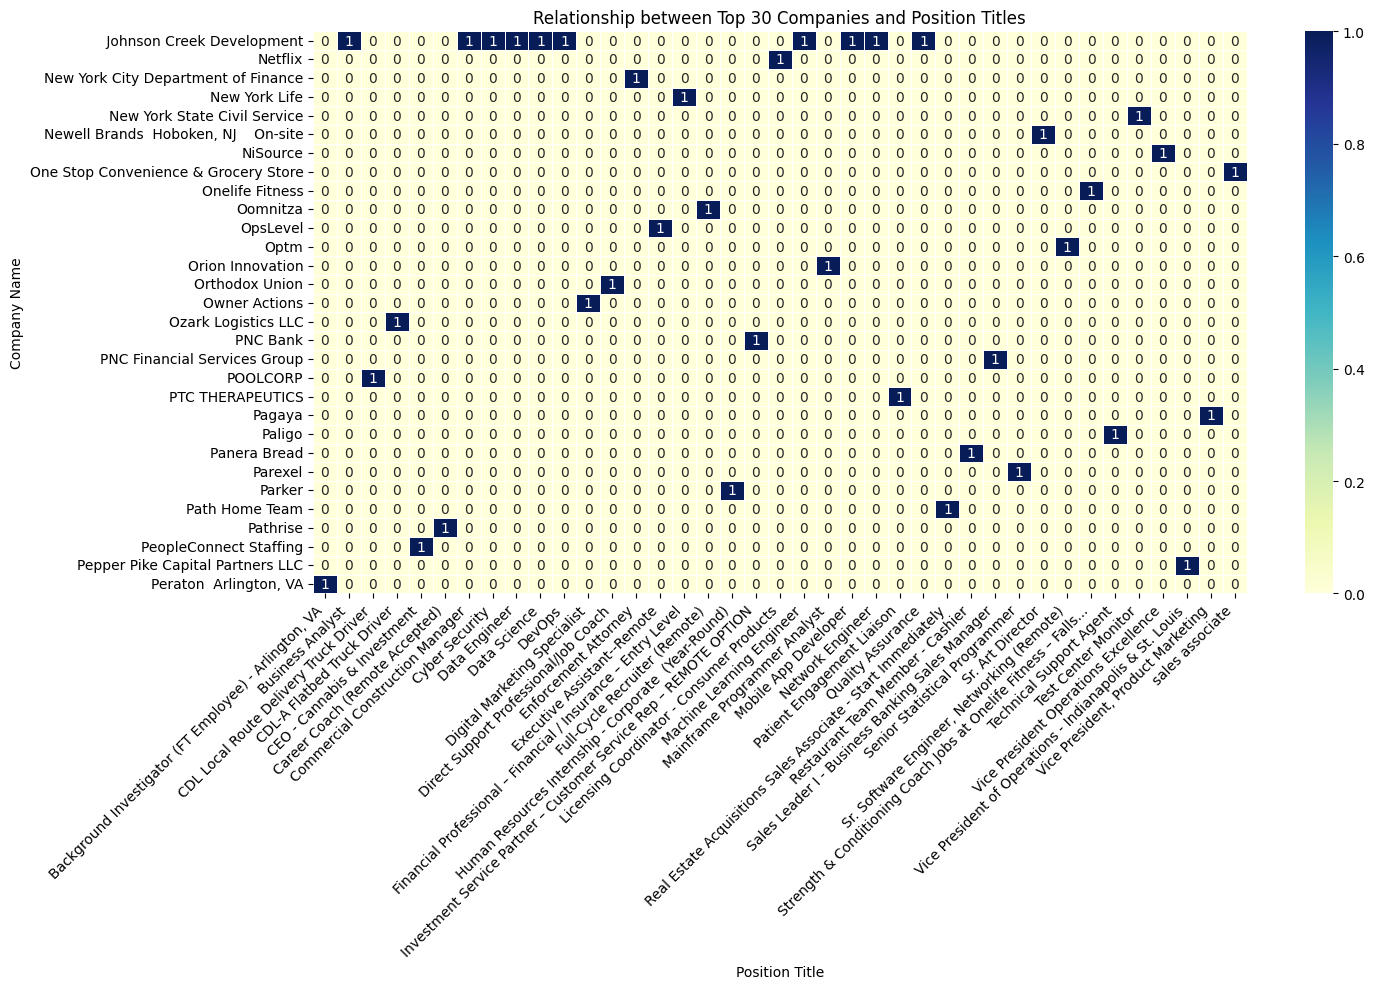

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 30 companies
top_30_companies = df_js['company_name'].value_counts().head(30).index.tolist()

# Filter the DataFrame for the top 30 companies
df_top_30 = df_js[df_js['company_name'].isin(top_30_companies)]

# Create a cross-tabulation (contingency table)
company_position_crosstab = pd.crosstab(df_top_30['company_name'], df_top_30['position_title'])

# Visualize using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(company_position_crosstab, cmap="YlGnBu", annot=True, fmt="d", cbar=True,
            linewidths=.5)
plt.title('Relationship between Top 30 Companies and Position Titles')
plt.xlabel('Position Title')
plt.ylabel('Company Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()